# Latent Diritchet Allocation

---

## Topic Modeling - Unsupervised Learning

Leer documentos no etiquetados y obtener un listado de posibles tópicos de manera no supervisada

In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.models import TfidfModel, LdaMulticore
import nltk
import numpy as np
import spacy
from document import Document
import pandas as pd
import util.log as log
log.init_logger()
from util.graphics.word_cloud import show_word_cloud
from util.graphics.bar import show_bar_graphic
from repository.csv_tools import get_documents, get_data

In [ ]:
dataframe = pd.read_csv('../data.csv')

In [ ]:
documents = get_documents('../data.csv')
preprocessed_docs = [document.lemmatized_string for document in documents]

In [ ]:
id2token = gensim.corpora.Dictionary(preprocessed_docs)

In [ ]:
id2token.filter_extremes(no_below=5, no_above=0.5)
bag_of_words = [id2token.doc2bow(doc) for doc in preprocessed_docs]
bag_of_words_tf_dif = TfidfModel(bag_of_words)[bag_of_words]

In [ ]:
lda_model = LdaMulticore(bag_of_words, num_topics=10, id2word=id2token, passes=100, workers=6, iterations = 100, random_state=0)

In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {}\nWords: {}\n'.format(idx, topic))

In [ ]:
show_word_cloud(lda_model, rows = 2, columns = 5)

In [ ]:
def get_topic(model, bow):
    possible_topics = model[bow]
    max = 0
    pmax = 0

    for topic, probability in possible_topics:
        if probability > pmax:
            max = topic
            pmax = probability

    return max 


def get_dictionary(model, bag_of_words):
    topic_counts = {}
    for i in range(len(model.print_topics())):
        topic_counts['{}'.format(i)] = 0

    for bag in bag_of_words:
        topic_counts['{}'.format(get_topic(model, bag))] += 1

    return topic_counts

In [ ]:
show_bar_graphic(get_dictionary(lda_model, bag_of_words), 'Topic', 'Count')

In [ ]:
lda_model2 = LdaMulticore(bag_of_words, num_topics=3, id2word=id2token, passes=100, workers=6, iterations = 100, random_state=0)

In [ ]:
for idx, topic in lda_model2.print_topics(-1):
    print('Topic: {}\nWords: {}\n'.format(idx, topic))

In [ ]:
show_bar_graphic(get_dictionary(lda_model2, bag_of_words), 'Topic', 'Count')

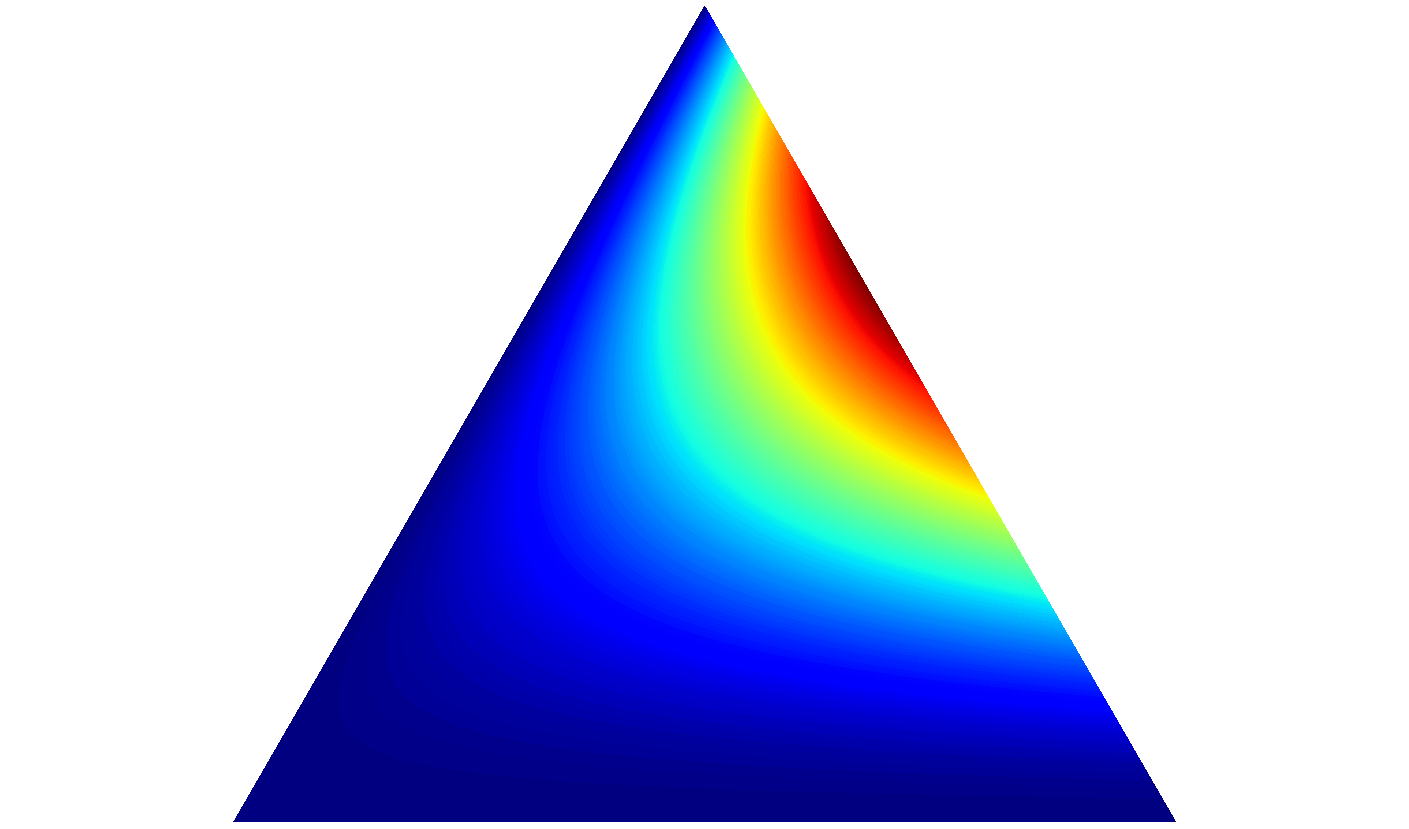

In [1]:
from util.graphics.lda_triangle import *
draw_pdf_contours(Dirichlet([1,2,3]))
